In [1]:
import numpy as np

X = np.array([[1,2,3,4],[6,7,8,9],[10,11,12,13],[8,9,10,11]])
X_s = (X-X.mean())#/X.std()
U,s,V = np.linalg.svd(X_s)
c1 = V.T[:,0]
c2 = V.T[:,1]
c3 = V.T[:,2]

In [16]:
X_s.dot(c1)

array([-10.5,  -0.5,   7.5,   3.5])

In [14]:


pca = PCA()
pca.fit_transform(X)

array([[ 1.05000000e+01,  1.41877261e-16,  1.27017964e-33,
        -6.03233547e-52],
       [ 5.00000000e-01,  1.94989087e-18, -9.54404464e-35,
         2.36700321e-50],
       [-7.50000000e+00,  2.21868956e-16,  2.44249001e-35,
         3.57536154e-52],
       [-3.50000000e+00, -4.95231388e-17,  3.74456549e-33,
         8.05583618e-52]])

In [17]:
X

array([[ 1,  2,  3,  4],
       [ 6,  7,  8,  9],
       [10, 11, 12, 13],
       [ 8,  9, 10, 11]])

In [19]:
step2 = (1/np.cov(X).shape[0]-1)*np.cov(X)

4

In [30]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
X = boston["data"]
y = boston["target"]
XX = pd.DataFrame(X,columns = boston["feature_names"])
XX.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [29]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-1.19818843e+02, -5.56005586e+00, -3.17269264e+00, ...,
         3.78374287e-01, -7.13108946e-02,  3.35451015e-02],
       [-1.68890155e+02,  1.01162086e+01, -3.07818868e+01, ...,
         4.86740794e-02, -9.47343278e-02, -3.31502751e-02],
       [-1.69311707e+02,  1.40805323e+01, -1.67536282e+01, ...,
        -4.67469154e-01, -1.07257460e-01, -4.50902543e-03],
       ...,
       [-1.38387163e+02,  9.38092201e-01, -3.72851813e+01, ...,
        -2.97952531e-01, -1.04654969e-01,  4.30883930e-02],
       [-1.37505173e+02,  4.25182510e+00, -3.59883419e+01, ...,
        -1.94149871e-01, -9.54593524e-02,  4.51072934e-02],
       [-1.39190333e+02,  1.00906423e+00, -2.97724323e+01, ...,
         4.16189839e-01, -7.03283698e-02,  4.55682936e-02]])

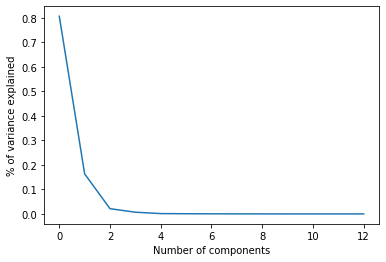

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca_reduced = PCA()
X_reduced = pca_reduced.fit_transform(X)
plt.plot(range(X_reduced.shape[1]),pca_reduced.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('% of variance explained')
plt.show()

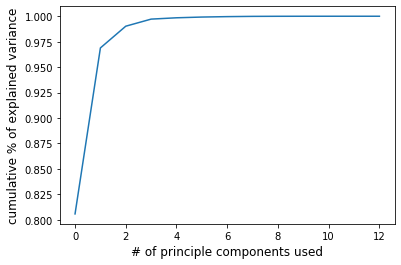

In [41]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(X.shape[1]),cumsum)
plt.xlabel('# of principle components used',fontsize=12)
plt.ylabel('cumulative % of explained variance',fontsize=12)
plt.show()

In [47]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer,f1_score
import numpy as np
f1_scorer = make_scorer(f1_score)


X,y = make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5)
for percentage in [1,0.95,0.90,0.85,0.80,0.75,0.70]:
    steps = [('pca',PCA(n_components=percentage)),('clf',LogisticRegression())]
    model = Pipeline(steps=steps)
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
    n_scores = cross_val_score(model,X,y,scoring=f1_scorer)
    print('Percentage: %.3f, Avg F1 score: %.3f (%.3f)'%(percentage,np.mean(n_scores),np.std(n_scores)))

Percentage: 1.000, Avg F1 score: 0.601 (0.026)
Percentage: 0.950, Avg F1 score: 0.743 (0.020)
Percentage: 0.900, Avg F1 score: 0.746 (0.012)
Percentage: 0.850, Avg F1 score: 0.736 (0.011)
Percentage: 0.800, Avg F1 score: 0.651 (0.041)
Percentage: 0.750, Avg F1 score: 0.643 (0.030)
Percentage: 0.700, Avg F1 score: 0.643 (0.030)


In [48]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer,f1_score
import numpy as np
f1_scorer = make_scorer(f1_score)


X,y = make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5)
for percentage in np.arange(1,20,5):
    steps = [('svd',TruncatedSVD(n_components=percentage)),('clf',LogisticRegression())]
    model = Pipeline(steps=steps)
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
    n_scores = cross_val_score(model,X,y,scoring=f1_scorer)
    print('Percentage: %.3f, Avg F1 score: %.3f (%.3f)'%(percentage,np.mean(n_scores),np.std(n_scores)))

Percentage: 1.000, Avg F1 score: 0.615 (0.025)
Percentage: 0.950, Avg F1 score: nan (nan)
Percentage: 0.900, Avg F1 score: nan (nan)
Percentage: 0.850, Avg F1 score: nan (nan)
Percentage: 0.800, Avg F1 score: nan (nan)
Percentage: 0.750, Avg F1 score: nan (nan)
Percentage: 0.700, Avg F1 score: nan (nan)


/Users/joseph.ganser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'float' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/joseph.ganser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'float' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/joseph.ganser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'float' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/joseph.ganser/anaconda3/lib/python3.7/site-pa

In [54]:
X = np.array([[1,2,3,4],[6,7,8,9],[10,11,12,13],[8,9,10,11]])
svd = TruncatedSVD(n_components=3)
svd.fit(X)
transformed = svd.transform(X)
transformed

array([[ 5.23390009e+00,  1.61440078e+00,  2.22044605e-16],
       [ 1.51603702e+01,  4.03949965e-01,  0.00000000e+00],
       [ 2.31015463e+01, -5.64410691e-01,  0.00000000e+00],
       [ 1.91309582e+01, -8.02303628e-02,  8.88178420e-16]])

In [58]:
np.arange(1,20,2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [61]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer,f1_score
import numpy as np
f1_scorer = make_scorer(f1_score)


X,y = make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5)
for n in list(np.arange(1,20,2)):
    steps = [('svd',TruncatedSVD(n_components=n)),('clf',LogisticRegression())]
    model = Pipeline(steps=steps)
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
    n_scores = cross_val_score(model,X,y,scoring=f1_scorer)
    print('Number components: %.3f, Avg F1 score: %.3f (%.3f)'%(n,np.mean(n_scores),np.std(n_scores)))

Number components: 1.000, Avg F1 score: 0.659 (0.019)
Number components: 3.000, Avg F1 score: 0.711 (0.013)
Number components: 5.000, Avg F1 score: 0.725 (0.014)
Number components: 7.000, Avg F1 score: 0.843 (0.015)
Number components: 9.000, Avg F1 score: 0.889 (0.019)
Number components: 11.000, Avg F1 score: 0.891 (0.023)
Number components: 13.000, Avg F1 score: 0.888 (0.017)
Number components: 15.000, Avg F1 score: 0.891 (0.016)
Number components: 17.000, Avg F1 score: 0.891 (0.016)
Number components: 19.000, Avg F1 score: 0.891 (0.016)


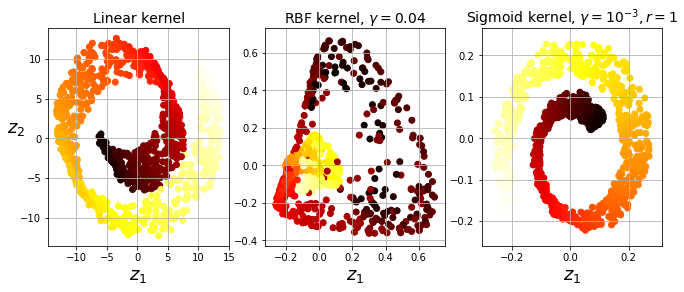

In [63]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

#save_fig("kernel_pca_plot")
plt.show()

In [64]:
from sklearn.decomposition import KernelPCA

X = np.array([[1,2,3,4],[6,7,8,9],[10,11,12,13],[8,9,10,11]])
lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
lin_pca.fit_transform(X)

array([[10.5,  0. ],
       [ 0.5, -0. ],
       [-7.5, -0. ],
       [-3.5,  0. ]])

In [74]:
from sklearn.datasets import make_swiss_roll
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
y = t > 6.9

clf = Pipeline([
    ('kpca',KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression(solver="liblinear"))
])

param_grid = [{
    'kpca__gamma':np.linspace(0.03,0.05,10),
    'kpca__kernel':["rbf","sigmoid"]#,"linear", "cosine"]
}]

grid_search = GridSearchCV(clf,param_grid,cv=3)
grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}
Pipeline(memory=None,
         steps=[('kpca',
                 KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3,
                           eigen_solver='auto', fit_inverse_transform=False,
                           gamma=0.043333333333333335, kernel='rbf',
                           kernel_params=None, max_iter=None, n_components=2,
                           n_jobs=None, random_state=None,
                           remove_zero_eig=False, tol=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                   

In [71]:
t

array([ 8.24234644, 13.67266022, 11.61126935, 10.35461227,  6.18283002,
        6.1826027 ,  5.25981413, 12.87590683, 10.37776449, 11.38581581,
        4.90639327, 13.85357398, 12.55797604,  6.71363795,  6.42604892,
        6.44093576,  7.57980457,  9.65810183,  8.78337487,  7.45715896,
       10.47896666,  6.02708764,  7.46578743,  8.16526801,  9.01074732,
       12.11249808,  6.59427004,  9.55893438, 10.29576475,  5.15017381,
       10.43836431,  6.31954098,  5.3254858 , 13.65542448, 13.81325648,
       12.33135449,  7.58330612,  5.63292697, 11.16113333,  8.8607285 ,
        5.86257225,  9.37932141,  5.03649316, 13.28253187,  7.15133285,
       10.9565144 ,  7.65019666,  9.6139146 ,  9.86501197,  6.45460118,
       13.85050881, 12.01784373, 13.5669579 , 13.14593807, 10.34746352,
       13.40084895,  5.54641116,  6.55948394,  5.13864614,  7.77855511,
        8.37558613,  7.26979335, 12.52305599,  8.07470987,  7.36013436,
        9.82717906,  6.04056851, 12.2729174 ,  5.41501224, 14.01